## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [48]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train_cleaned3.csv')
valid_data = pd.read_csv('./data/test_cleaned3.csv')

In [49]:
'''
! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip
! pip install ipywidgets
'''

'\n! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip\n! pip install ipywidgets\n'

In [50]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,103.0,403.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [51]:
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


## Replace "Concert Enjoyment column" with numerical values and removing 'concer_goer_' before any concert goer id

In [52]:
# Replace "Concert Enjoyment column" with numerical values
train_data['Concert Enjoyment'] = train_data['Concert Enjoyment'].replace(['Worst Concert Ever', 'Did Not Enjoy', 'Enjoyed', 'Best Concert Ever'], [0, 1, 2, 3])

In [53]:
# Remove 'concer_goer_' before all Concer Goer ID and transform it into integer
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].str.replace('concert_goer_', '')
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].astype(int)

valid_data['Concert Goer ID'] = valid_data['Concert Goer ID'].str.replace('concert_goer_', '')
valid_data['Concert Goer ID'] = valid_data['Concert Goer ID'].astype(int)

In [54]:
train_data.head()

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,1985,140.0,Paraguay,1
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,1874,158.0,United Kingdom (UK),2
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,103.0,403.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,442,159.0,United States of America (USA),1
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,1149,150.0,Canada,0
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,930,166.0,United Kingdom (UK),1


In [55]:
valid_data.head()

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,1777,177.0,Fiji


## Recommendation engine

In [56]:
band_rating = train_data.groupby('Band Name').agg({'Concert Enjoyment': 'mean'})
train_data['Band Rating'] = train_data['Band Name'].map(band_rating['Concert Enjoyment'])

In [57]:
# create a vocabulary of words with 100 most common words in "Band Name" column but remove "the" and "and" and "of" and "for" and "my" from the vocabulary
from sklearn.feature_extraction.text import CountVectorizer

X = train_data[['Band Name']]

vectorizer = CountVectorizer(max_features=15, stop_words=['the', 'and', 'of', 'for', 'my'])
X_voc = vectorizer.fit_transform(X['Band Name'])

band_name = pd.DataFrame(X_voc.toarray(), columns=vectorizer.get_feature_names())

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Concert rating /!\

In [58]:
concert_list = train_data.groupby('Concert ID').agg({'Concert Enjoyment': 'mean'})
concert_list.loc[900]

Concert Enjoyment    1.944134
Name: 900.0, dtype: float64

In [59]:
concert_list

,Concert Enjoyment
Concert ID,
0.0,1.100592
1.0,2.190476
2.0,1.005780
3.0,1.037037
4.0,1.403614
...,...
995.0,1.209877
996.0,1.090361
997.0,1.538961


In [60]:
concert_list.loc[350]

Concert Enjoyment    2.275
Name: 350.0, dtype: float64

In [61]:
# Add a new column "Concert Rating" to train_data which is the average of "Concert Enjoyment" for each "Concert ID"

train_data['Concert Rating'] = train_data['Concert ID'].map(concert_list['Concert Enjoyment'])
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,...,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment,Band Rating,Concert Rating
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,...,-0.958408,-0.943548,-1.636806,29.0,1985,140.0,Paraguay,1,1.568355,1.944134
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,...,0.017777,-1.910675,0.610265,43.0,1874,158.0,United Kingdom (UK),2,2.181132,2.180791
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,103.0,403.0,False,False,True,...,1.968772,-0.064167,-1.260871,68.0,442,159.0,United States of America (USA),1,0.704655,0.604651
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,...,1.022827,-0.348389,-1.147251,17.0,1149,150.0,Canada,0,0.767250,0.320856
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,...,-1.166528,-0.043766,0.969661,59.0,930,166.0,United Kingdom (UK),1,2.181132,2.041420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,...,0.175175,0.914245,0.357359,50.0,707,180.0,United States of America (USA),1,0.993267,0.872611
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,...,-0.285776,-0.323312,0.641180,71.0,1373,143.0,Bulgaria,0,0.993267,1.158824
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,...,-0.965547,1.020598,1.027389,27.0,1286,176.0,Canada,1,0.917380,0.668605
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,...,0.351411,0.175762,1.455654,39.0,1845,176.0,Canada,1,2.118284,1.275000


In [62]:
valid_data['Concert Rating'] = valid_data['Concert ID'].map(concert_list['Concert Enjoyment'])
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Rating
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,1587,165.0,United States of America (USA),2.275000
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,293,151.0,Kenya,1.843023
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,1068,146.0,Canada,1.576687
3,ConcertExperience_106446,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,1315,183.0,United States of America (USA),1.695652
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,1777,177.0,Fiji,0.896552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,1710,178.0,United States of America (USA),0.944099
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,1758,186.0,Canada,1.567073
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,1481,158.0,Greece,2.119760
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,1461,170.0,United Kingdom (UK),0.474286


### Band genre rating by Concer Goer /!\

In [63]:
# Get the mean of the Enjoyment of each Concert Goer ID depending of the Band Genre
band_genre_rating = train_data.groupby(['Band Genre', 'Concert Goer ID']).agg({'Concert Enjoyment': 'mean'})
band_genre_rating

Concert Enjoyment
Band Genre  Concert Goer ID                   
Country     0                         1.714286
            1                         1.500000
            2                         2.000000
            3                         1.250000
            4                         1.333333
...                                        ...
Rock n Roll 1995                      1.125000
            1996                      1.300000
            1997                      1.444444
            1998                      1.666667
            1999                      1.750000

[13833 rows x 1 columns]

In [64]:
# Add new columns for each band genre to train_data which is the mean of the Enjoyment of each Concert Goer ID depending of the Band Genre
for genre in train_data['Band Genre'].unique():
    train_data[genre + " user rate"] = train_data['Concert Goer ID'].map(band_genre_rating.loc[genre]['Concert Enjoyment'])

In [65]:
train_data


,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,...,Concert Enjoyment,Band Rating,Concert Rating,Indie/Alt Rock user rate,Pop Music user rate,Rock n Roll user rate,RnB user rate,Heavy Metal user rate,Hip Hop/Rap user rate,Country user rate
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,...,1,1.568355,1.944134,2.000000,1.555556,2.076923,1.000000,0.909091,1.666667,1.500000
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,...,2,2.181132,2.180791,2.000000,1.909091,1.166667,1.615385,1.533333,1.838710,1.750000
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,103.0,403.0,False,False,True,...,1,0.704655,0.604651,1.500000,1.000000,1.388889,1.105263,1.222222,1.172414,2.000000
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,...,0,0.767250,0.320856,1.400000,1.529412,1.500000,1.666667,0.923077,2.000000,2.000000
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,...,1,2.181132,2.041420,1.375000,1.600000,1.166667,0.944444,1.187500,1.433333,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,...,1,0.993267,0.872611,1.916667,1.416667,1.571429,1.800000,1.285714,1.629630,2.000000
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,...,0,0.993267,1.158824,1.250000,1.062500,1.857143,0.785714,0.857143,1.700000,1.500000
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,...,1,0.917380,0.668605,1.777778,1.777778,1.444444,1.555556,1.153846,1.476190,2.500000
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,...,1,2.118284,1.275000,1.777778,1.764706,1.785714,1.083333,1.687500,1.700000,2.666667


In [66]:
for genre in train_data['Band Genre'].unique():
    valid_data[genre + " user rate"] = valid_data['Concert Goer ID'].map(band_genre_rating.loc[genre]['Concert Enjoyment'])

In [67]:
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,...,Height (cm),Concert Goer Country of Origin,Concert Rating,Indie/Alt Rock user rate,Pop Music user rate,Rock n Roll user rate,RnB user rate,Heavy Metal user rate,Hip Hop/Rap user rate,Country user rate
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,...,165.0,United States of America (USA),2.275000,1.555556,1.400000,1.384615,1.153846,1.000000,1.333333,1.500000
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,...,151.0,Kenya,1.843023,1.800000,1.500000,1.454545,1.111111,1.533333,1.777778,2.500000
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,...,146.0,Canada,1.576687,1.400000,1.571429,1.272727,1.444444,1.600000,1.666667,2.000000
3,ConcertExperience_106446,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,532.0,22026.0,True,False,False,...,183.0,United States of America (USA),1.695652,1.857143,1.375000,1.500000,1.250000,1.250000,1.909091,1.000000
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,...,177.0,Fiji,0.896552,1.500000,1.928571,1.700000,1.277778,1.375000,1.666667,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,...,178.0,United States of America (USA),0.944099,1.818182,1.400000,1.791667,1.272727,1.857143,1.928571,2.000000
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,...,186.0,Canada,1.567073,1.545455,1.666667,1.705882,1.142857,1.333333,2.041667,1.500000
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,...,158.0,Greece,2.119760,2.125000,1.727273,1.625000,1.083333,2.181818,1.318182,2.333333
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,...,170.0,United Kingdom (UK),0.474286,1.285714,1.272727,1.545455,0.833333,0.785714,1.703704,2.000000


### Band Name rating by Concer Goer /!\

In [68]:
# Get the mean of the Enjoyment of each Concert Goer ID depending of the Band Name
band_name_rating = train_data.groupby(['Band Name', 'Concert Goer ID']).agg({'Concert Enjoyment': 'mean'})
band_name_rating

Concert Enjoyment
Band Name                  Concert Goer ID                   
A Dozen Running Iced Frogs 0                         2.000000
                           2                         2.000000
                           3                         0.750000
                           4                         1.750000
                           6                         1.333333
...                                                       ...
Why Frogs, Why?            1993                      0.500000
                           1994                      1.000000
                           1995                      1.000000
                           1996                      0.000000
                           1999                      1.500000

[83111 rows x 1 columns]

In [69]:
# Add new columns for each band name to train_data which is the mean of the Enjoyment of each Concert Goer ID depending of the Band Name
for name in train_data['Band Name'].unique():
    train_data[name + " user rate"] = train_data['Concert Goer ID'].map(band_name_rating.loc[name]['Concert Enjoyment'])
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,...,Flight of the Knickers user rate,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,...,1.50,NaN,1.0,1.500000,NaN,1.000000,1.000000,2.5,0.000000,1.00
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,...,2.00,0.5,NaN,2.500000,1.000000,1.000000,2.000000,3.0,1.000000,1.00
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,103.0,403.0,False,False,True,...,1.00,1.5,0.0,2.500000,1.666667,NaN,2.000000,2.0,1.000000,NaN
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,...,2.00,NaN,1.5,2.000000,2.000000,1.500000,NaN,2.0,NaN,2.00
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,...,1.00,1.0,1.0,NaN,1.400000,0.666667,1.500000,1.5,0.333333,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,...,1.25,1.5,1.0,NaN,2.000000,NaN,1.500000,2.0,1.000000,NaN
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,...,1.00,1.0,0.8,2.000000,1.000000,NaN,1.500000,1.0,0.000000,1.00
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,...,2.00,1.5,1.5,3.000000,2.000000,1.777778,0.666667,NaN,0.500000,0.00
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,...,2.20,1.0,NaN,2.666667,NaN,2.000000,2.000000,2.0,0.666667,0.50


In [70]:
for name in train_data['Band Name'].unique():
    valid_data[name + " user rate"] = valid_data['Concert Goer ID'].map(band_name_rating.loc[name]['Concert Enjoyment'])
valid_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,...,Flight of the Knickers user rate,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,...,1.0,1.000000,NaN,2.0,1.000000,1.000000,1.333333,2.00,NaN,1.0
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,...,3.0,0.666667,NaN,3.0,1.000000,1.600000,2.000000,1.75,NaN,NaN
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,...,2.0,NaN,NaN,3.0,1.666667,NaN,1.000000,NaN,NaN,2.0
3,ConcertExperience_106446,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,532.0,22026.0,True,False,False,...,1.0,1.000000,NaN,NaN,1.000000,1.000000,1.750000,2.00,0.50,1.0
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,...,NaN,NaN,NaN,2.0,2.000000,0.666667,1.000000,NaN,0.00,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,...,1.0,1.000000,2.00,2.0,NaN,0.666667,1.500000,2.75,2.00,1.0
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,...,NaN,2.000000,2.00,2.0,1.333333,1.500000,1.000000,2.00,1.00,1.0
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,...,NaN,1.000000,NaN,3.0,1.000000,1.000000,2.000000,2.00,2.00,0.0
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,...,2.0,1.000000,1.00,NaN,2.000000,0.500000,0.750000,NaN,0.50,1.0


In [71]:
# List all the "Band Name" but dont return to the line
for name in train_data['Band Name'].unique():
    print("'" + name + " user rate', ", end='')

'Teenage Crazy Blue Knickers user rate', 'Beyond Devon user rate', 'Ron Talent user rate', 'Devon Revival user rate', 'A Dozen Running Iced Frogs user rate', 'Big Joystick user rate', 'Ron's Midnight Jockies user rate', 'Running in Devon user rate', 'Running Twins user rate', 'Ronatron user rate', 'Big Division user rate', 'The Crazy Heroes of Devon user rate', 'My Heart, Your Thighs user rate', 'Why Frogs, Why? user rate', 'Joystick Army user rate', 'This Joystick user rate', 'Ron Nor user rate', 'Disciples Of Devon user rate', 'Purely Blue user rate', 'Crazy Crazy user rate', 'King Blue user rate', 'Twilight of the Joystick Gods user rate', 'Crazy Joystick Cult user rate', 'Joystick of the Big Knickers user rate', 'Joystick A Dozen user rate', 'Joystick for the Jockies user rate', 'Frogsica user rate', 'Rubbish Devon Frogs user rate', 'Running for the Crazy Woman user rate', 'Knickers for the Jockies user rate', 'Knickers A Dozen user rate', 'The Running Crazy Jockies user rate', 'Ru

## Beginning of Processing

In [72]:
# Extract the column "Concert ID", "Concert Goer ID", "Concert Rating" from train_data
concert_info = train_data[['Band Name', 'Band Genre', 'Band Country of Origin', 'Band Debut', 'Concert Attendance', 'Inside Venue', 'Rain', 'Concert ID', 'Concert Goer ID', 'Concert Goer Age', 'Seated', 'Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin', 'Concert Rating', 'Indie/Alt Rock user rate', 'Pop Music user rate', 'Rock n Roll user rate', 'RnB user rate', 'Heavy Metal user rate', 'Hip Hop/Rap user rate', 'Country user rate', 'Teenage Crazy Blue Knickers user rate', 'Beyond Devon user rate', 'Ron Talent user rate', 'Devon Revival user rate', 'A Dozen Running Iced Frogs user rate', 'Big Joystick user rate', "Ron's Midnight Jockies user rate", 'Running in Devon user rate', 'Running Twins user rate', 'Ronatron user rate', 'Big Division user rate', 'The Crazy Heroes of Devon user rate', 'My Heart, Your Thighs user rate', 'Why Frogs, Why? user rate', 'Joystick Army user rate', 'This Joystick user rate', 'Ron Nor user rate', 'Disciples Of Devon user rate', 'Purely Blue user rate', 'Crazy Crazy user rate', 'King Blue user rate', 'Twilight of the Joystick Gods user rate', 'Crazy Joystick Cult user rate', 'Joystick of the Big Knickers user rate', 'Joystick A Dozen user rate', 'Joystick for the Jockies user rate', 'Frogsica user rate', 'Rubbish Devon Frogs user rate', 'Running for the Crazy Woman user rate', 'Knickers for the Jockies user rate', 'Knickers A Dozen user rate', 'The Running Crazy Jockies user rate', 'Running at the Disco user rate', 'Big Autumn user rate', 'Crazy Dream and a Pinch of Joystick user rate', 'Puddle of Joystick user rate', "It's My Joystick user rate", 'Joystick Attack user rate', 'Crazyplay user rate', 'Devon Thunder Thighs user rate', 'The Running Knickers user rate', 'Taking Back Autumn user rate', 'Undercover Joystick and the Crazy Knickers user rate', 'Flight of the Knickers user rate', 'Lord of the Crazy Frogs user rate', 'Crazy Frogs of Devon user rate', 'Big Frogs Dream user rate', 'Das Joystick user rate', 'The Crazy R Experience user rate', 'Allo Knickers user rate', 'Super Crazy Frogs user rate', 'The Big Service user rate', 'Crazy Tooth user rate',  'Concert Enjoyment']]
concert_info

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert Attendance,Inside Venue,Rain,Concert ID,Concert Goer ID,Concert Goer Age,...,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate,Concert Enjoyment
0,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,2980.0,False,False,900.0,1985,29.0,...,NaN,1.0,1.500000,NaN,1.000000,1.000000,2.5,0.000000,1.00,1
1,Beyond Devon,Pop Music,United States of America (USA),1968.0,54.0,True,False,731.0,1874,43.0,...,0.5,NaN,2.500000,1.000000,1.000000,2.000000,3.0,1.000000,1.00,2
2,Ron Talent,Rock n Roll,Canada,1955.0,403.0,False,False,103.0,442,68.0,...,1.5,0.0,2.500000,1.666667,NaN,2.000000,2.0,1.000000,NaN,1
3,Devon Revival,RnB,United States of America (USA),1992.0,8103.0,False,True,704.0,1149,17.0,...,NaN,1.5,2.000000,2.000000,1.500000,NaN,2.0,NaN,2.00,0
4,Beyond Devon,Pop Music,United States of America (USA),1968.0,54.0,False,False,95.0,930,59.0,...,1.0,1.0,NaN,1.400000,0.666667,1.500000,1.5,0.333333,1.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,Crazy Joystick Cult,RnB,Canada,1985.0,162754.0,True,False,70.0,707,50.0,...,1.5,1.0,NaN,2.000000,NaN,1.500000,2.0,1.000000,NaN,1
169996,Crazy Joystick Cult,RnB,Canada,1985.0,54.0,False,False,963.0,1373,71.0,...,1.0,0.8,2.000000,1.000000,NaN,1.500000,1.0,0.000000,1.00,0
169997,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,54.0,False,False,764.0,1286,27.0,...,1.5,1.5,3.000000,2.000000,1.777778,0.666667,NaN,0.500000,0.00,1
169998,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,22026.0,False,True,694.0,1845,39.0,...,1.0,NaN,2.666667,NaN,2.000000,2.000000,2.0,0.666667,0.50,1


In [73]:
concert_info_valid = valid_data[['Band Name', 'Band Genre', 'Band Country of Origin', 'Band Debut', 'Concert Attendance', 'Inside Venue', 'Rain', 'Concert ID', 'Concert Goer ID', 'Concert Goer Age', 'Seated', 'Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin', 'Concert Rating', 'Indie/Alt Rock user rate', 'Pop Music user rate', 'Rock n Roll user rate', 'RnB user rate', 'Heavy Metal user rate', 'Hip Hop/Rap user rate', 'Country user rate', 'Teenage Crazy Blue Knickers user rate', 'Beyond Devon user rate', 'Ron Talent user rate', 'Devon Revival user rate', 'A Dozen Running Iced Frogs user rate', 'Big Joystick user rate', "Ron's Midnight Jockies user rate", 'Running in Devon user rate', 'Running Twins user rate', 'Ronatron user rate', 'Big Division user rate', 'The Crazy Heroes of Devon user rate', 'My Heart, Your Thighs user rate', 'Why Frogs, Why? user rate', 'Joystick Army user rate', 'This Joystick user rate', 'Ron Nor user rate', 'Disciples Of Devon user rate', 'Purely Blue user rate', 'Crazy Crazy user rate', 'King Blue user rate', 'Twilight of the Joystick Gods user rate', 'Crazy Joystick Cult user rate', 'Joystick of the Big Knickers user rate', 'Joystick A Dozen user rate', 'Joystick for the Jockies user rate', 'Frogsica user rate', 'Rubbish Devon Frogs user rate', 'Running for the Crazy Woman user rate', 'Knickers for the Jockies user rate', 'Knickers A Dozen user rate', 'The Running Crazy Jockies user rate', 'Running at the Disco user rate', 'Big Autumn user rate', 'Crazy Dream and a Pinch of Joystick user rate', 'Puddle of Joystick user rate', "It's My Joystick user rate", 'Joystick Attack user rate', 'Crazyplay user rate', 'Devon Thunder Thighs user rate', 'The Running Knickers user rate', 'Taking Back Autumn user rate', 'Undercover Joystick and the Crazy Knickers user rate', 'Flight of the Knickers user rate', 'Lord of the Crazy Frogs user rate', 'Crazy Frogs of Devon user rate', 'Big Frogs Dream user rate', 'Das Joystick user rate', 'The Crazy R Experience user rate', 'Allo Knickers user rate', 'Super Crazy Frogs user rate', 'The Big Service user rate', 'Crazy Tooth user rate']]
concert_info_valid

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert Attendance,Inside Venue,Rain,Concert ID,Concert Goer ID,Concert Goer Age,...,Flight of the Knickers user rate,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate
0,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,2980.0,True,False,350.0,1587,74.0,...,1.0,1.000000,NaN,2.0,1.000000,1.000000,1.333333,2.00,NaN,1.0
1,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,8103.0,True,True,173.0,293,29.0,...,3.0,0.666667,NaN,3.0,1.000000,1.600000,2.000000,1.75,NaN,NaN
2,Puddle of Joystick,Rock n Roll,Canada,2010.0,2980.0,True,True,502.0,1068,27.0,...,2.0,NaN,NaN,3.0,1.666667,NaN,1.000000,NaN,NaN,2.0
3,Flight of the Knickers,Hip Hop/Rap,Canada,2014.0,22026.0,True,False,532.0,1315,38.0,...,1.0,1.000000,NaN,NaN,1.000000,1.000000,1.750000,2.00,0.50,1.0
4,Devon Revival,RnB,United States of America (USA),1992.0,2980.0,False,False,636.0,1777,21.0,...,NaN,NaN,NaN,2.0,2.000000,0.666667,1.000000,NaN,0.00,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,2980.0,True,False,411.0,1710,42.0,...,1.0,1.000000,2.00,2.0,NaN,0.666667,1.500000,2.75,2.00,1.0
29996,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,8103.0,True,False,135.0,1758,37.0,...,NaN,2.000000,2.00,2.0,1.333333,1.500000,1.000000,2.00,1.00,1.0
29997,Crazyplay,Pop Music,United States of America (USA),1995.0,8103.0,False,False,987.0,1481,45.0,...,NaN,1.000000,NaN,3.0,1.000000,1.000000,2.000000,2.00,2.00,0.0
29998,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,8103.0,False,True,830.0,1461,36.0,...,2.0,1.000000,1.00,NaN,2.000000,0.500000,0.750000,NaN,0.50,1.0


In [74]:
concert_info = pd.concat([band_name, concert_info], axis=1)
concert_info.drop(['Band Name'], axis=1, inplace=True)

In [76]:
concert_info_valid = pd.concat([band_name, concert_info_valid], axis=1)
concert_info_valid.drop(['Band Name'], axis=1, inplace=True)

In [77]:
#concert_info.dropna(inplace=True)

In [78]:
# Convert "Seated" into binary
concert_info['Seated'] = concert_info['Seated'].replace(['True', 'False'], [1, 0])
concert_info_valid['Seated'] = concert_info_valid['Seated'].replace(['True', 'False'], [1, 0])

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Apply ont hot ender to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(concert_info[['Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(concert_info_valid[['Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))

# One hot encoding removed index; put it back
OH_cols_train.index = concert_info.index
OH_cols_valid.index = concert_info_valid.index

# Remove categorical columns (will replace with one-hot encoding)
numeric_train_data = concert_info.drop(['Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)
numeric_valid_data = concert_info_valid.drop(['Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)

# Add one-hot encoded columns to numerical features
concert_info = pd.concat([OH_cols_train,numeric_train_data], axis=1)
concert_info_valid = pd.concat([OH_cols_valid,numeric_valid_data], axis=1)

In [80]:
concert_info

,0,1,2,3,4,5,6,7,8,9,...,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate,Concert Enjoyment
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,1.0,1.500000,NaN,1.000000,1.000000,2.5,0.000000,1.00,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.5,NaN,2.500000,1.000000,1.000000,2.000000,3.0,1.000000,1.00,2
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.5,0.0,2.500000,1.666667,NaN,2.000000,2.0,1.000000,NaN,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,1.5,2.000000,2.000000,1.500000,NaN,2.0,NaN,2.00,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,NaN,1.400000,0.666667,1.500000,1.5,0.333333,1.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.5,1.0,NaN,2.000000,NaN,1.500000,2.0,1.000000,NaN,1
169996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.8,2.000000,1.000000,NaN,1.500000,1.0,0.000000,1.00,0
169997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.5,1.5,3.000000,2.000000,1.777778,0.666667,NaN,0.500000,0.00,1
169998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,NaN,2.666667,NaN,2.000000,2.000000,2.0,0.666667,0.50,1


In [81]:
concert_info_valid

,0,1,2,3,4,5,6,7,8,9,...,Flight of the Knickers user rate,Lord of the Crazy Frogs user rate,Crazy Frogs of Devon user rate,Big Frogs Dream user rate,Das Joystick user rate,The Crazy R Experience user rate,Allo Knickers user rate,Super Crazy Frogs user rate,The Big Service user rate,Crazy Tooth user rate
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.000000,NaN,2.0,1.000000,1.000000,1.333333,2.00,NaN,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.666667,NaN,3.0,1.000000,1.600000,2.000000,1.75,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,NaN,NaN,3.0,1.666667,NaN,1.000000,NaN,NaN,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.000000,NaN,NaN,1.000000,1.000000,1.750000,2.00,0.5,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,2.0,2.000000,0.666667,1.000000,NaN,0.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [578]:
# One hot encoding for "Band Name" and "Band Genre"
#concert_info = pd.get_dummies(concert_info, columns=['Band Name', 'Band Genre', "Band Country of Origin", 'Concert Goer Country of Origin'])
#concert_info

,Band Debut,Concert Attendance,Inside Venue,Rain,Concert ID,Concert Goer ID,Concert Goer Age,Seated,Personnality Trait 1,Personnality Trait 2,...,Concert Goer Country of Origin_United Arab Emirates (UAE),Concert Goer Country of Origin_United Kingdom (UK),Concert Goer Country of Origin_United States of America (USA),Concert Goer Country of Origin_Uzbekistan,Concert Goer Country of Origin_Vanuatu,Concert Goer Country of Origin_Vatican City (Holy See),Concert Goer Country of Origin_Vietnam,Concert Goer Country of Origin_Yemen,Concert Goer Country of Origin_Zambia,Concert Goer Country of Origin_Zimbabwe
0,1976.0,2980.0,False,False,900.0,1985,29.0,NaN,0.330843,-0.958408,...,0,0,0,0,0,0,0,0,0,0
1,1968.0,54.0,True,False,731.0,1874,43.0,True,-2.069449,0.017777,...,0,1,0,0,0,0,0,0,0,0
2,1955.0,403.0,False,False,103.0,442,68.0,True,-0.484268,1.968772,...,0,0,1,0,0,0,0,0,0,0
3,1992.0,8103.0,False,True,704.0,1149,17.0,False,-0.858054,1.022827,...,0,0,0,0,0,0,0,0,0,0
4,1968.0,54.0,False,False,95.0,930,59.0,False,-0.793029,-1.166528,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,1985.0,162754.0,True,False,70.0,707,50.0,False,-0.095021,0.175175,...,0,0,1,0,0,0,0,0,0,0
169996,1985.0,54.0,False,False,963.0,1373,71.0,False,-0.733719,-0.285776,...,0,0,0,0,0,0,0,0,0,0
169997,2005.0,54.0,False,False,764.0,1286,27.0,False,0.744969,-0.965547,...,0,0,0,0,0,0,0,0,0,0
169998,1995.0,22026.0,False,True,694.0,1845,39.0,True,0.821976,0.351411,...,0,0,0,0,0,0,0,0,0,0


---

In [82]:
X = concert_info.drop(['Concert Enjoyment'], axis=1)
y = concert_info['Concert Enjoyment']

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
'''
X = concert_info.drop(['Concert Enjoyment'], axis=1)
y = concert_info['Concert Enjoyment']
'''

In [83]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Process test data
val_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

In [41]:
X_train

array([[0.0, 0.0, 1.0, ..., 2.6666666666666665, nan, 2.0],
       [0.0, 0.0, 0.0, ..., 1.3333333333333333, 0.5, nan],
       [0.0, 0.0, 1.0, ..., nan, 1.6666666666666667, 2.0],
       ...,
       [0.0, 0.0, 0.0, ..., 2.6666666666666665, 0.6666666666666666, 1.5],
       [0.0, 1.0, 0.0, ..., 1.0, 1.0, 1.3333333333333333],
       [0.0, 0.0, 0.0, ..., 2.0, 1.0, 1.0]], dtype=object)

### Test avec Random Forest

----

In [431]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.604911648266761

---

In [ ]:
y_pred = clf.predict(X_test)

In [581]:
# cross validate with xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# define the model
model = XGBClassifier()
# define the grid search parameters
param_grid = {
    'max_depth': [5],
    'n_estimators': [1500],
    'learning_rate': [0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
}

# define the grid search by validating with f1 score
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_micro', n_jobs=-1, cv=3, verbose=1)
# perform the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best: 0.787000 using {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1500, 'subsample': 0.9}


In [622]:
# Feat band genre rating by user and concert id rating (OHE in categorical columns)

clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.7935

In [84]:
# xgboost model


from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

KeyboardInterrupt: 

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

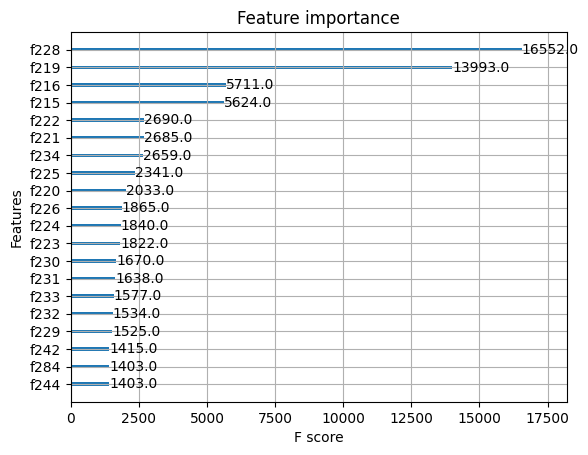

In [637]:
# get best features with feature importance

# plot feature importance

from xgboost import plot_importance

plot_importance(clf, max_num_features=20)

## Submission

In [623]:
X_valid = concert_info_valid.to_numpy()

In [639]:
X

array([[0.0, 0.0, 0.0, ..., 2.5, 0.0, 1.0],
       [0.0, 0.0, 1.0, ..., 3.0, 1.0, 1.0],
       [0.0, 0.0, 0.0, ..., 2.0, 1.0, nan],
       ...,
       [0.0, 0.0, 0.0, ..., nan, 0.5, 0.0],
       [0.0, 0.0, 0.0, ..., 2.0, 0.6666666666666666, 0.5],
       [0.0, 0.0, 0.0, ..., 2.0, 1.0, 2.0]], dtype=object)

In [646]:
X_valid

array([[0.0, 0.0, 0.0, ..., 2.0, nan, 1.0],
       [0.0, 0.0, 0.0, ..., 1.75, nan, nan],
       [0.0, 0.0, 0.0, ..., nan, nan, 2.0],
       ...,
       [0.0, 0.0, 0.0, ..., 2.0, 2.0, 0.0],
       [0.0, 0.0, 0.0, ..., nan, 0.5, 1.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.75, nan]], dtype=object)

In [647]:
y_final_pred = clf.predict(X_valid)

In [648]:
y_final_pred

array([2, 2, 1, ..., 3, 1, 0])

In [649]:
initial_data = pd.read_csv('./data/test.csv')
submission = pd.DataFrame([initial_data['Id'], y_final_pred]).T

In [650]:
submission.columns = ['Id', 'Predicted']

In [651]:
submission

,Id,Predicted
0,ConcertExperience_70055,2
1,ConcertExperience_34799,2
2,ConcertExperience_100410,1
3,ConcertExperience_106446,1
4,ConcertExperience_127249,1
...,...,...
29995,ConcertExperience_82288,2
29996,ConcertExperience_27139,2
29997,ConcertExperience_197434,3
29998,ConcertExperience_166029,1


In [652]:
submission['Predicted'] = submission['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})

In [653]:
submission

,Id,Predicted
0,ConcertExperience_70055,Enjoyed
1,ConcertExperience_34799,Enjoyed
2,ConcertExperience_100410,Did Not Enjoy
3,ConcertExperience_106446,Did Not Enjoy
4,ConcertExperience_127249,Did Not Enjoy
...,...,...
29995,ConcertExperience_82288,Enjoyed
29996,ConcertExperience_27139,Enjoyed
29997,ConcertExperience_197434,Best Concert Ever
29998,ConcertExperience_166029,Did Not Enjoy


In [636]:
submission.to_csv('./submission3.csv', index=False)

In [655]:
# Analyse result
submission['Predicted'].value_counts() / submission.shape[0]

Did Not Enjoy         0.412933
Enjoyed               0.409200
Best Concert Ever     0.097033
Worst Concert Ever    0.080833
Name: Predicted, dtype: float64

In [136]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64